<a href="https://colab.research.google.com/github/RafaelMagnusson1/Kaggle_comp/blob/main/Abalone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

sns.set_palette("Accent")
sns.set_style("darkgrid")

In [107]:
df_train = pd.read_csv(r"/content/drive/MyDrive/Data Science/Kaggle/Data/Abalone/train.csv")
df_test = pd.read_csv(r"/content/drive/MyDrive/Data Science/Kaggle/Data/Abalone/test.csv")

In [108]:
df_train.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


# Exploratory Data Analysis

In [109]:
df_train.describe().round(2)

,id,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
count,90615.00,90615.00,90615.00,90615.00,90615.00,90615.00,90615.00,90615.00,90615.00
mean,45307.00,0.52,0.40,0.14,0.79,0.34,0.17,0.23,9.70
std,26158.44,0.12,0.10,0.04,0.46,0.20,0.10,0.13,3.18
min,0.00,0.08,0.06,0.00,0.00,0.00,0.00,0.00,1.00
25%,22653.50,0.44,0.34,0.11,0.42,0.18,0.09,0.12,8.00
50%,45307.00,0.55,0.42,0.14,0.80,0.33,0.17,0.22,9.00
75%,67960.50,0.60,0.47,0.16,1.07,0.46,0.23,0.30,11.00
max,90614.00,0.82,0.65,1.13,2.83,1.49,0.76,1.00,29.00


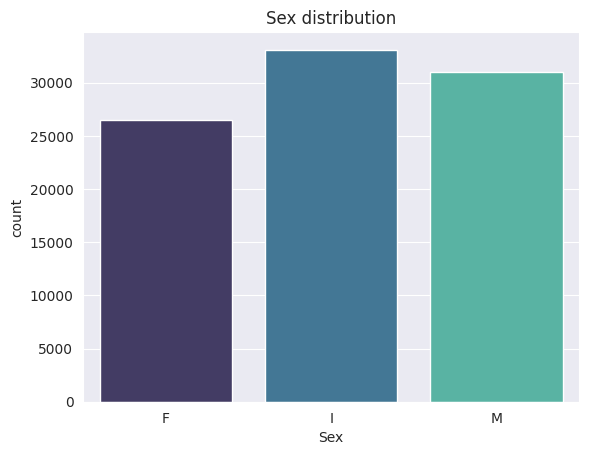

In [110]:
sns.countplot(data = df_train, x = "Sex", hue = "Sex", palette = "mako")

plt.title("Sex distribution")

plt.show()

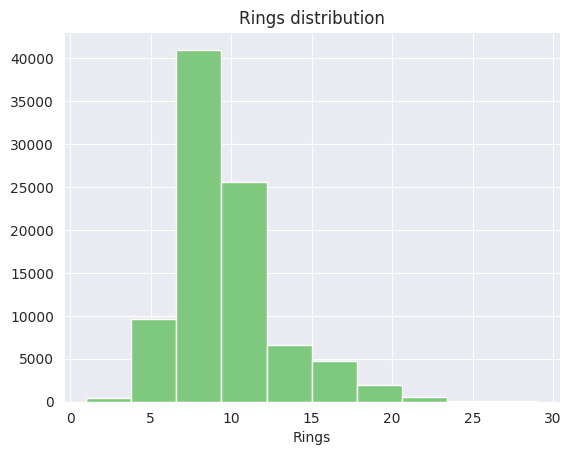

In [111]:
plt.hist(df_train["Rings"])
plt.title("Rings distribution")
plt.xlabel("Rings")
plt.show()

Text(0.5, 1.1, 'Correlation with Rings')

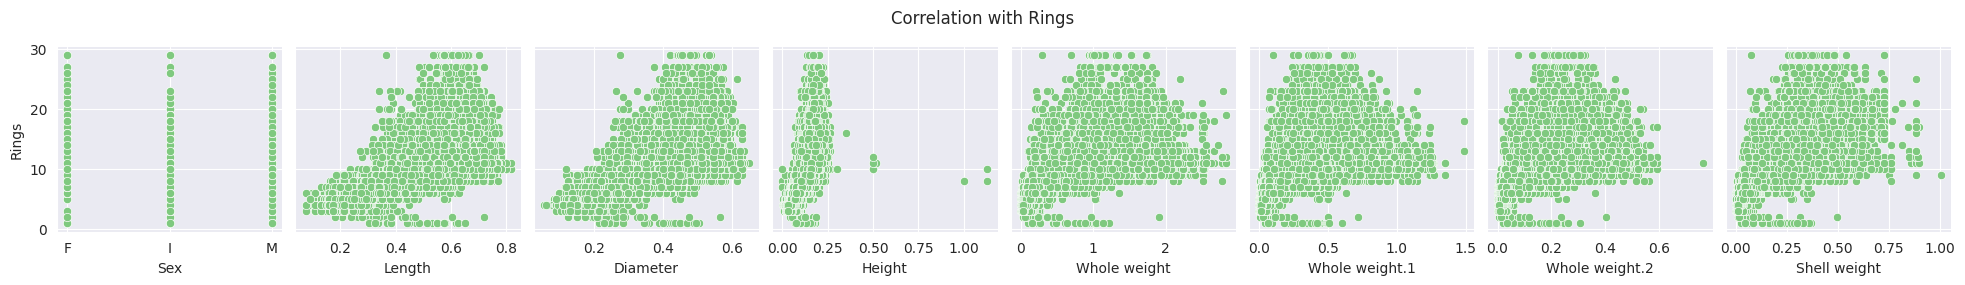

In [112]:
x_vars = ['Sex',
 'Length',
 'Diameter',
 'Height',
 'Whole weight',
 'Whole weight.1',
 'Whole weight.2',
 'Shell weight']

ax = sns.pairplot(data=df_train,y_vars="Rings",x_vars=x_vars)
ax.fig.suptitle("Correlation with Rings",y=1.1)

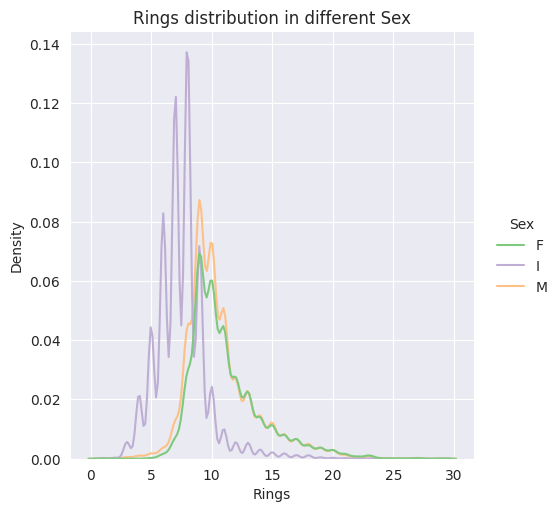

In [113]:
sns.displot(data = df_train , x = "Rings", hue = "Sex", kind = "kde")

plt.title("Rings distribution in different Sex")
plt.show()

Evaluating variabels that correlates within theirselves

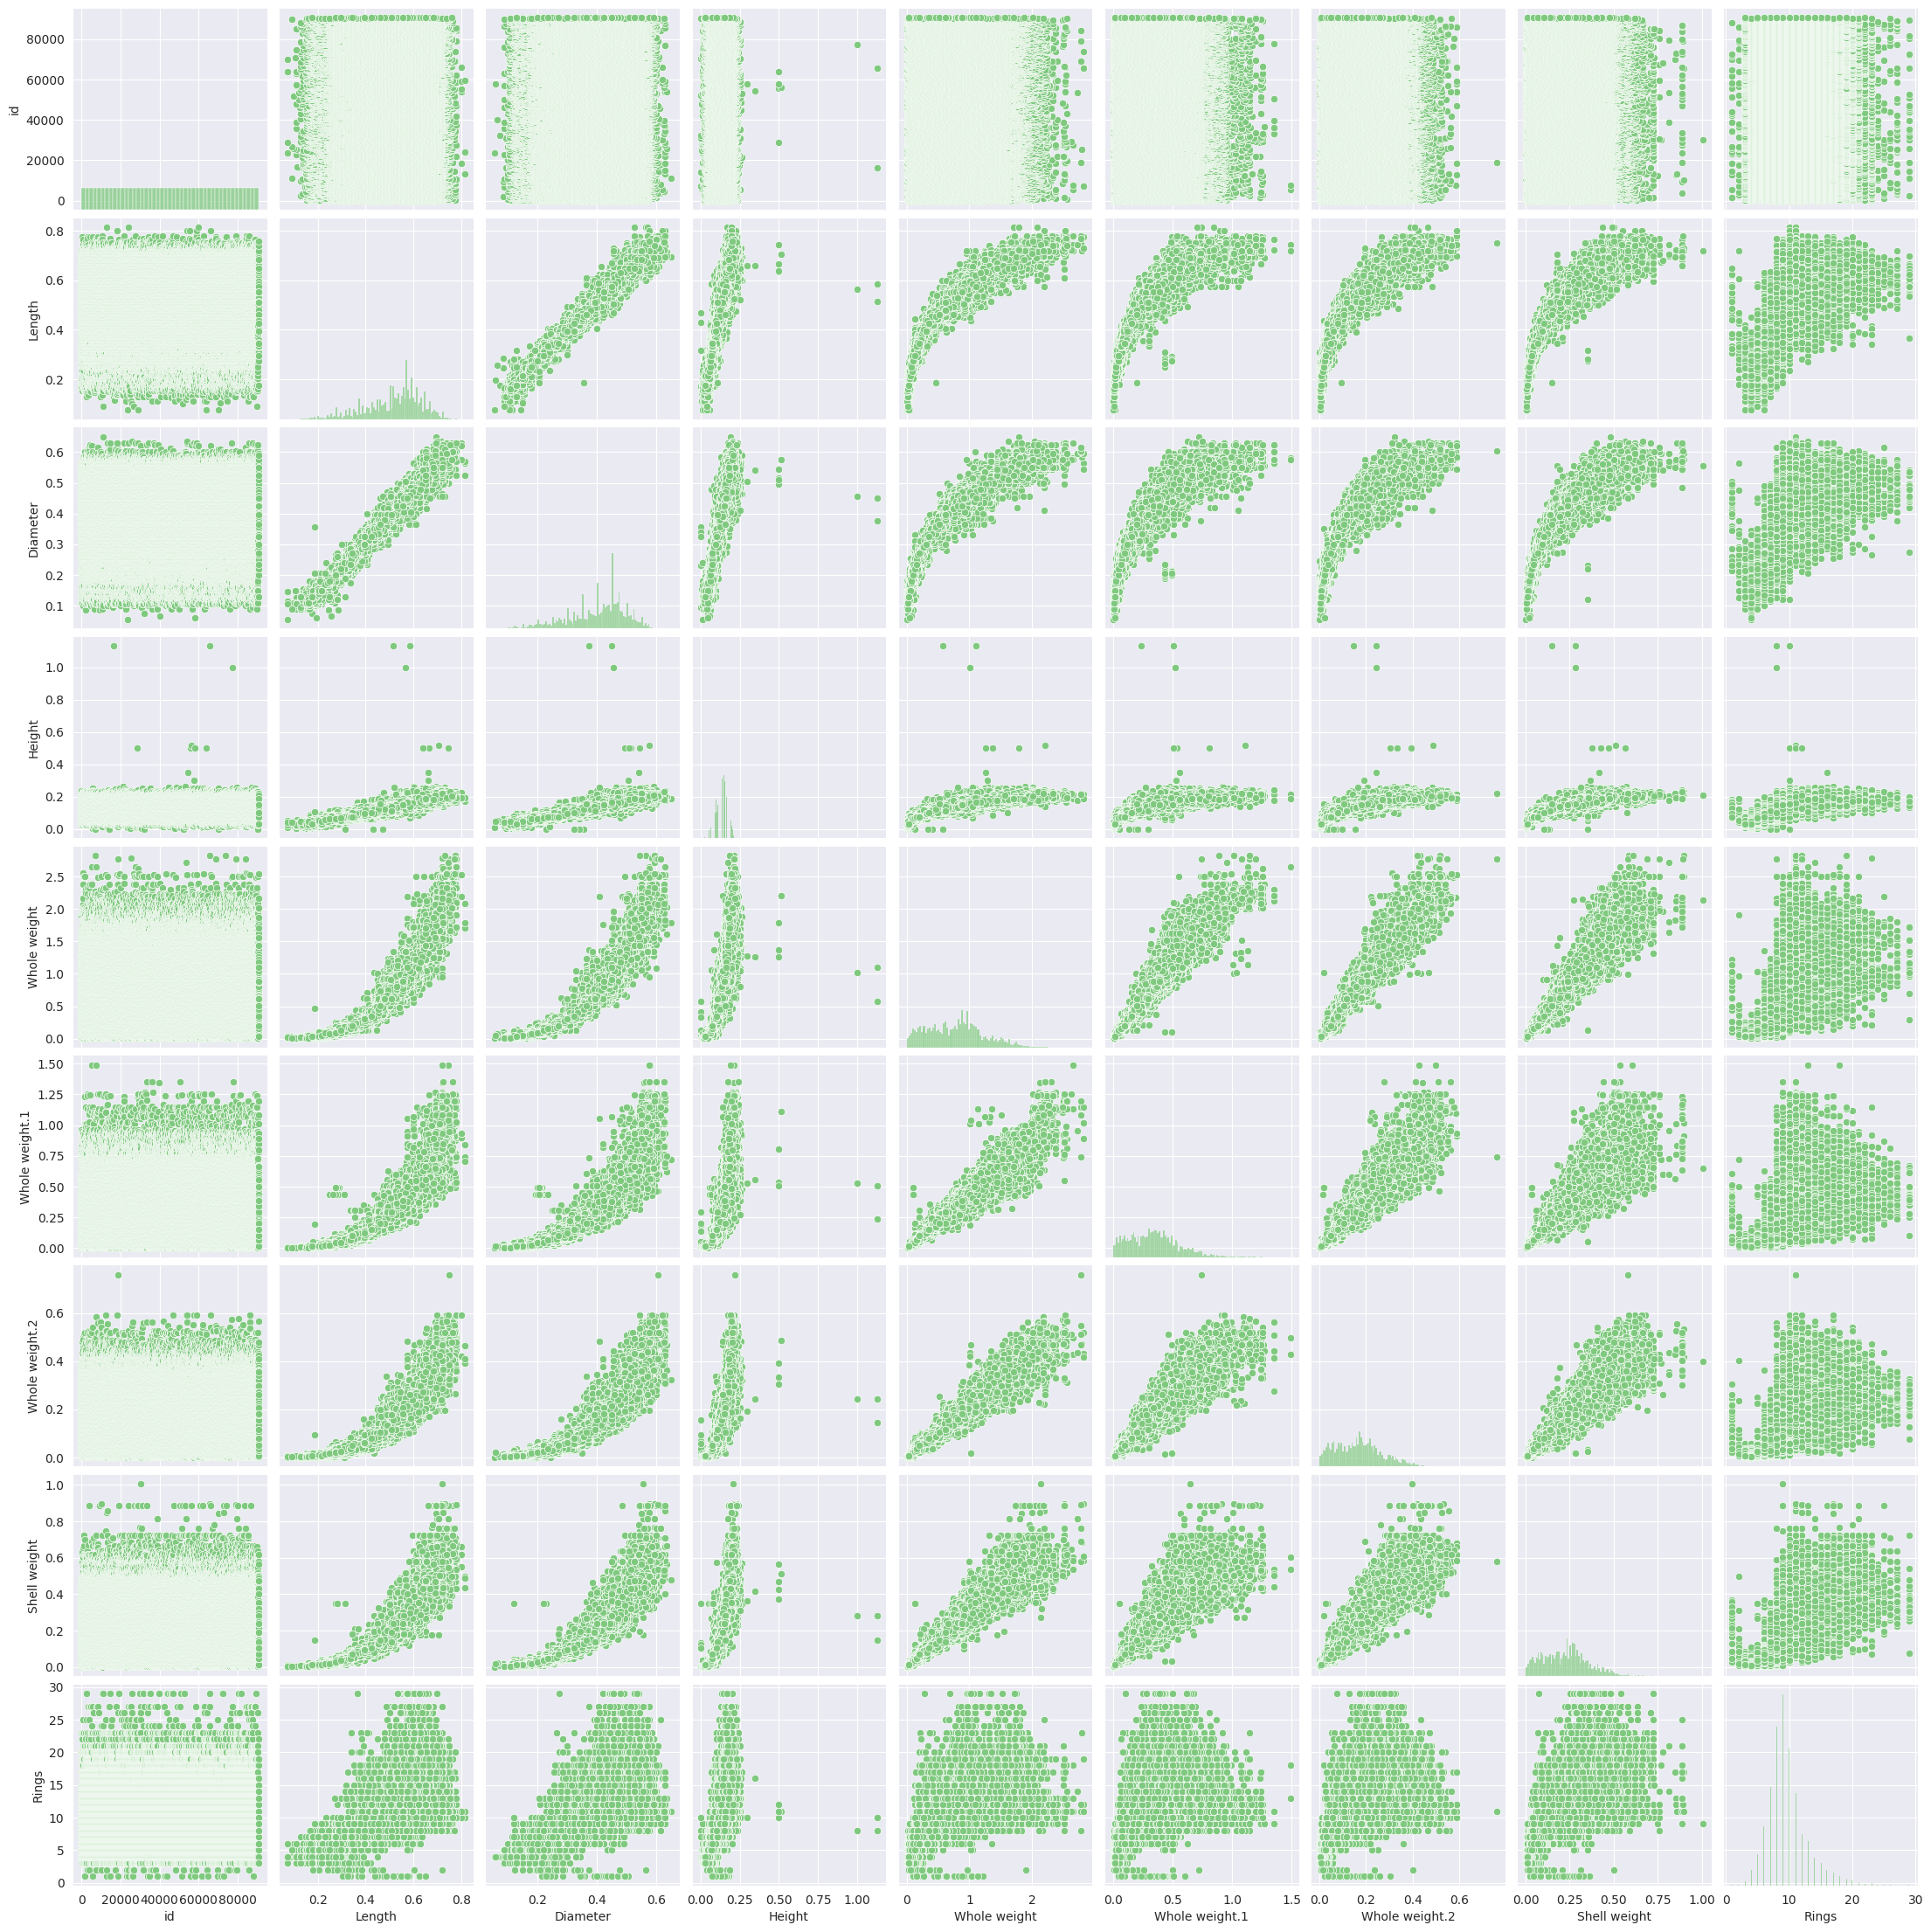

In [114]:
sns.pairplot(data = df_train)

# Data preparation and spliting

In [115]:
df_train_tr = pd.get_dummies(df_train)

In [116]:
X = df_train_tr.drop(["id","Rings"], axis = 1)
y = df_train_tr["Rings"]

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

#  Model fitting

In [119]:
from sklearn.metrics import mean_squared_log_error

Defining a function to evaluate model in a automatic way

In [120]:
def model_fit_and_evaluation(model,x_train,y_train,x_test,y_test):

  try:
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    RMSLE = mean_squared_log_error(y_test,y_pred, squared = False)
    return RMSLE

  except:
    return np.nan

**SKLearn models**

In [121]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [122]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

In [123]:
RMSLE_values = []

for model_name, model_instance in models.items():
  RMSE_point = model_fit_and_evaluation(model_instance, X_train, y_train, X_test, y_test)
  RMSLE_values.append(RMSE_point)

In [124]:
RMSLE_values

[nan,
 nan,
 0.2855345061094785,
 0.26438366282289943,
 0.21832716162634397,
 0.15294242280172557]

In [125]:
model_names = []

for model_name, model_instance in models.items():
  model_names.append(model_name)

In [126]:
model_names

['Linear Regression',
 'Ridge',
 'Lasso',
 'ElasticNet',
 'Decision Tree',
 'Random Forest']

In [127]:
df = pd.DataFrame({'RMSLE': RMSLE_values, 'Model Name': model_names})

In [128]:
df

,RMSLE,Model Name
0,NaN,Linear Regression
1,NaN,Ridge
2,0.285535,Lasso
3,0.264384,ElasticNet
4,0.218327,Decision Tree
5,0.152942,Random Forest


**XGBoost**

In [129]:
import xgboost as xgb

xgb_rg = xgb.XGBRegressor(objective="reg:squaredlogerror")

In [130]:
xgb_rg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, objective='reg:squaredlogerror', ...)

In [131]:
y_pred = xgb_rg.predict(X_test)

In [132]:
RMSLE = mean_squared_log_error(y_test,y_pred, squared = False)

In [133]:
RMSLE

0.14820452287329833

Applyng cross-validation

In [134]:
dmatrix = xgb.DMatrix(data = X, label = y)

In [135]:
params = {"objective":"reg:squaredlogerror"}


cv_resultados = xgb.cv(dtrain= dmatrix, params = params, nfold = 3, num_boost_round = 5, metrics = "rmsle",
                       as_pandas = True, seed = 123)

In [136]:
print(cv_resultados)

   train-rmsle-mean  train-rmsle-std  test-rmsle-mean  test-rmsle-std
0          1.646807         0.000331         1.646812        0.000723
1          1.478802         0.000315         1.478813        0.000694
2          1.317756         0.000296         1.317774        0.000663
3          1.164426         0.000275         1.164452        0.000629
4          1.019633         0.000251         1.019671        0.000591


Increasing the number of boost rounds

In [137]:
params = {"objective":"reg:squaredlogerror"}


cv_resultados = xgb.cv(dtrain= dmatrix, params = params, nfold = 3, num_boost_round = 30, metrics = "rmsle",
                       as_pandas = True, seed = 123)

In [138]:
print(cv_resultados)

    train-rmsle-mean  train-rmsle-std  test-rmsle-mean  test-rmsle-std
0           1.646807         0.000331         1.646812        0.000723
1           1.478802         0.000315         1.478813        0.000694
2           1.317756         0.000296         1.317774        0.000663
3           1.164426         0.000275         1.164452        0.000629
4           1.019633         0.000251         1.019671        0.000591
5           0.884257         0.000226         0.884305        0.000549
6           0.759214         0.000208         0.759269        0.000495
7           0.645399         0.000197         0.645467        0.000447
8           0.543674         0.000209         0.543783        0.000380
9           0.454709         0.000262         0.454842        0.000269
10          0.378972         0.000324         0.379154        0.000163
11          0.316698         0.000378         0.316948        0.000085
12          0.267471         0.000488         0.267774        0.000133
13    

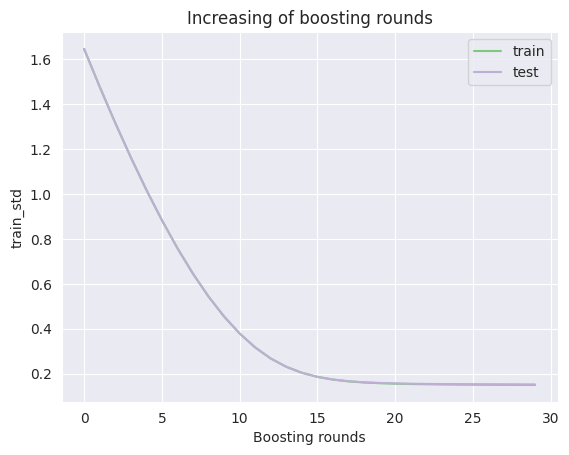

In [139]:
plt.plot(cv_resultados["train-rmsle-mean"], label = "train")
plt.plot(cv_resultados["test-rmsle-mean"], label = "test")
plt.xlabel("Boosting rounds")
plt.ylabel("train_std")
plt.legend()
plt.title("Increasing of boosting rounds")

plt.show()

Using early stopping

In [140]:
params = {"objective":"reg:squaredlogerror"}


cv_resultados = xgb.cv(dtrain= dmatrix, params = params, nfold = 3, num_boost_round = 30,early_stopping_rounds = 5, metrics = "rmsle",
                       as_pandas = True, seed = 123)

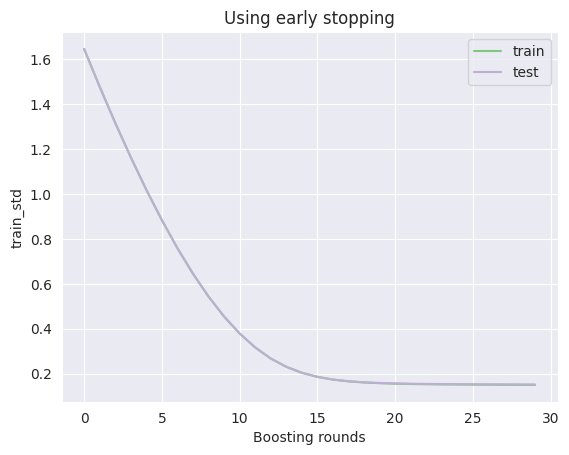

In [141]:
plt.plot(cv_resultados["train-rmsle-mean"], label = "train")
plt.plot(cv_resultados["test-rmsle-mean"], label = "test")
plt.xlabel("Boosting rounds")
plt.ylabel("train_std")
plt.legend()
plt.title("Using early stopping")

plt.show()

Model optimization

In [142]:
from sklearn.model_selection import RandomizedSearchCV

In [143]:
params = {
        'learning_rate': [0.1, 0.2, 0.3],
        'max_depth': [0, 2, 4, 6, 10],
        'colsample_bytree': [0.1, 0.5, 1],
        'n_estimators': [10, 25, 50],
}

In [144]:
import xgboost as xgb

xgb_rg_opt = xgb.XGBRegressor(objective="reg:squaredlogerror")

In [145]:
random_search_cv = RandomizedSearchCV(estimator=xgb_rg_opt, param_distributions=params, n_iter=5, cv=4, scoring='neg_mean_absolute_error', verbose=1)

In [146]:
random_search_cv.fit(X, y)

Fitting 4 folds for each of 5 candidates, totalling 20 fits


RandomizedSearchCV(cv=4,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          objective='reg:squaredlogerror', ...),
                   n_iter=5,
                   param_distributions={'colsample_bytree': [0.1, 0.5, 1],
                                        'learning_rate': [0.1, 0.2, 0.3],
                                        'max_depth': [0, 2, 4, 6, 10],
                                        'n_estimators': [10, 25, 50]},
                   scoring='neg_mean_absolute_error', verbose=1)

In [147]:
random_search_cv.best_score_

-1.4374206190490924

In [148]:
random_search_cv.best_params_

{'n_estimators': 25,
 'max_depth': 6,
 'learning_rate': 0.2,
 'colsample_bytree': 0.5}

# Sample Submission

In [149]:
random_search_cv.fit(X_train, y_train)

Fitting 4 folds for each of 5 candidates, totalling 20 fits


RandomizedSearchCV(cv=4,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          objective='reg:squaredlogerror', ...),
                   n_iter=5,
                   param_distributions={'colsample_bytree': [0.1, 0.5, 1],
                                        'learning_rate': [0.1, 0.2, 0.3],
                                        'max_depth': [0, 2, 4, 6, 10],
                                        'n_estimators': [10, 25, 50]},
                   scoring='neg_mean_absolute_error', verbose=1)

In [150]:
df_test.drop("id", axis = 1, inplace = True)

In [151]:
df_test_tr = pd.get_dummies(df_test)

In [152]:
df_test_tr

,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Sex_F,Sex_I,Sex_M
0,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005,False,False,True
1,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750,False,False,True
2,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405,False,False,True
3,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350,False,False,True
4,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050,False,True,False
...,...,...,...,...,...,...,...,...,...,...
60406,0.345,0.260,0.085,0.1775,0.0735,0.0265,0.0500,False,True,False
60407,0.525,0.410,0.145,0.8445,0.3885,0.1670,0.2050,True,False,False
60408,0.590,0.440,0.155,1.1220,0.3930,0.2000,0.2650,False,True,False
60409,0.660,0.525,0.190,1.4935,0.5885,0.3575,0.4350,True,False,False


In [153]:
sample_sub = random_search_cv.predict(df_test_tr)

In [154]:
sample_submission_df = pd.read_csv(r"/content/drive/MyDrive/Data Science/Kaggle/Data/Abalone/sample_submission.csv")

In [155]:
sample_submission_df.head()

,id,Rings
0,90615,10
1,90616,10
2,90617,10
3,90618,10
4,90619,10


In [156]:
sample_submission_df["Rings"] = sample_sub

In [157]:
sample_submission_df.to_csv("submission.csv", index = False)